<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp/blob/main/Daily_challenge_W4D5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d milanvaddoriya/data-science-job-salary

Saving kaggle.json to kaggle.json
  0% 0.00/9.97k [00:00<?, ?B/s]
100% 9.97k/9.97k [00:00<00:00, 12.1MB/s]


In [2]:
!unzip data-science-job-salary.zip

Archive:  data-science-job-salary.zip
  inflating: datascience_salaries.csv  


In [6]:
import pandas as pd
datascience_salaries = pd.read_csv('datascience_salaries.csv')
print(datascience_salaries.head())
print(datascience_salaries.columns)

   Unnamed: 0       job_title   job_type experience_level       location  \
0           0  Data scientist  Full Time           Senior  New York City   
1           2  Data scientist  Full Time           Senior         Boston   
2           3  Data scientist  Full Time           Senior         London   
3           4  Data scientist  Full Time           Senior         Boston   
4           5  Data scientist  Full Time           Senior  New York City   

  salary_currency  salary  
0             USD  149000  
1             USD  120000  
2             USD   68000  
3             USD  120000  
4             USD  149000  
Index(['Unnamed: 0', 'job_title', 'job_type', 'experience_level', 'location',
       'salary_currency', 'salary'],
      dtype='object')


In [7]:
# Handle missing values
datascience_salaries.dropna(inplace=True)  # Drop rows with any missing values


In [8]:
# Remove duplicates
datascience_salaries.drop_duplicates(inplace=True)  # Remove duplicate rows if any

In [10]:
# Perform group-wise analysis of the experience_level column
experience_level_analysis = datascience_salaries.groupby('experience_level')['salary'].agg(['mean', 'median'])
print(experience_level_analysis)

                          mean   median
experience_level                       
Entry             36111.111111  30000.0
Executive         76076.923077  46000.0
Mid               51786.885246  51000.0
Senior            75088.033012  68000.0


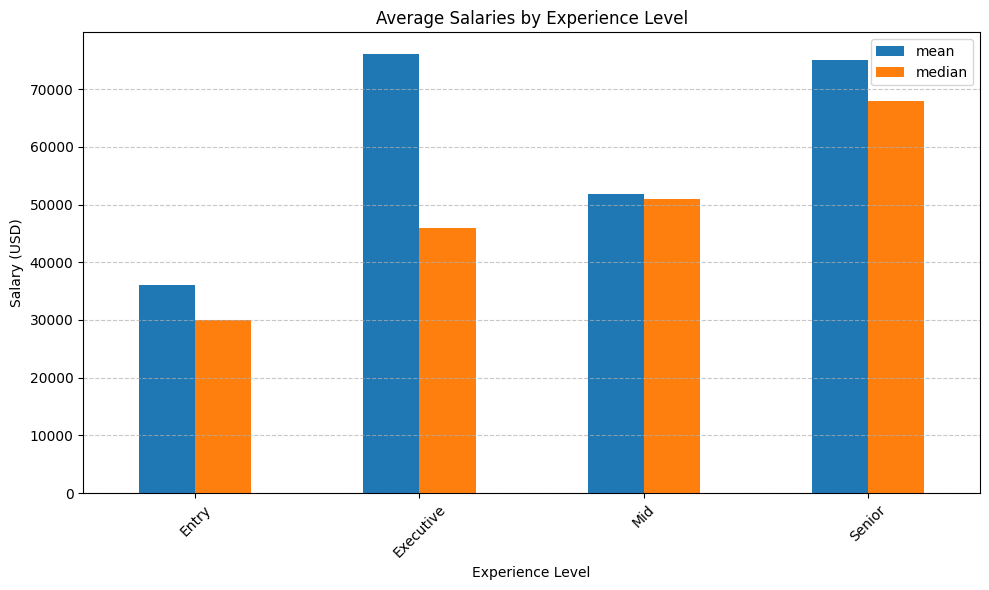

In [11]:
# Visualize the average salaries for each experience level using a bar chart
import matplotlib.pyplot as plt

# Plotting. The experience_level_analysis DataFrame, which contains
# the average and median salaries for each experience level, is plotted as a bar chart.
experience_level_analysis.plot(kind='bar', figsize=(10, 6))
# The title, x-axis label, and y-axis label of the plot are set using
# the plt.title(), plt.xlabel(), and plt.ylabel() functions, respectively.
plt.title('Average Salaries by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
# The plt.xticks() function is used to rotate the x-axis tick labels
# by 45 degrees for better readability.
plt.xticks(rotation=45)
# Gridlines are added to the y-axis using the plt.grid() function.
# The axis='y' parameter specifies that gridlines should be added
# along the y-axis, and linestyle='--' specifies the style of the gridlines.
plt.grid(axis='y', linestyle='--', alpha=0.7)
# The plt.tight_layout() function adjusts the layout of the plot to prevent
# overlapping elements, and plt.show() displays the plot.
lt.tight_layout()
plt.show()